# Лабораторная работа 5. Свёрточные нейронные сети.


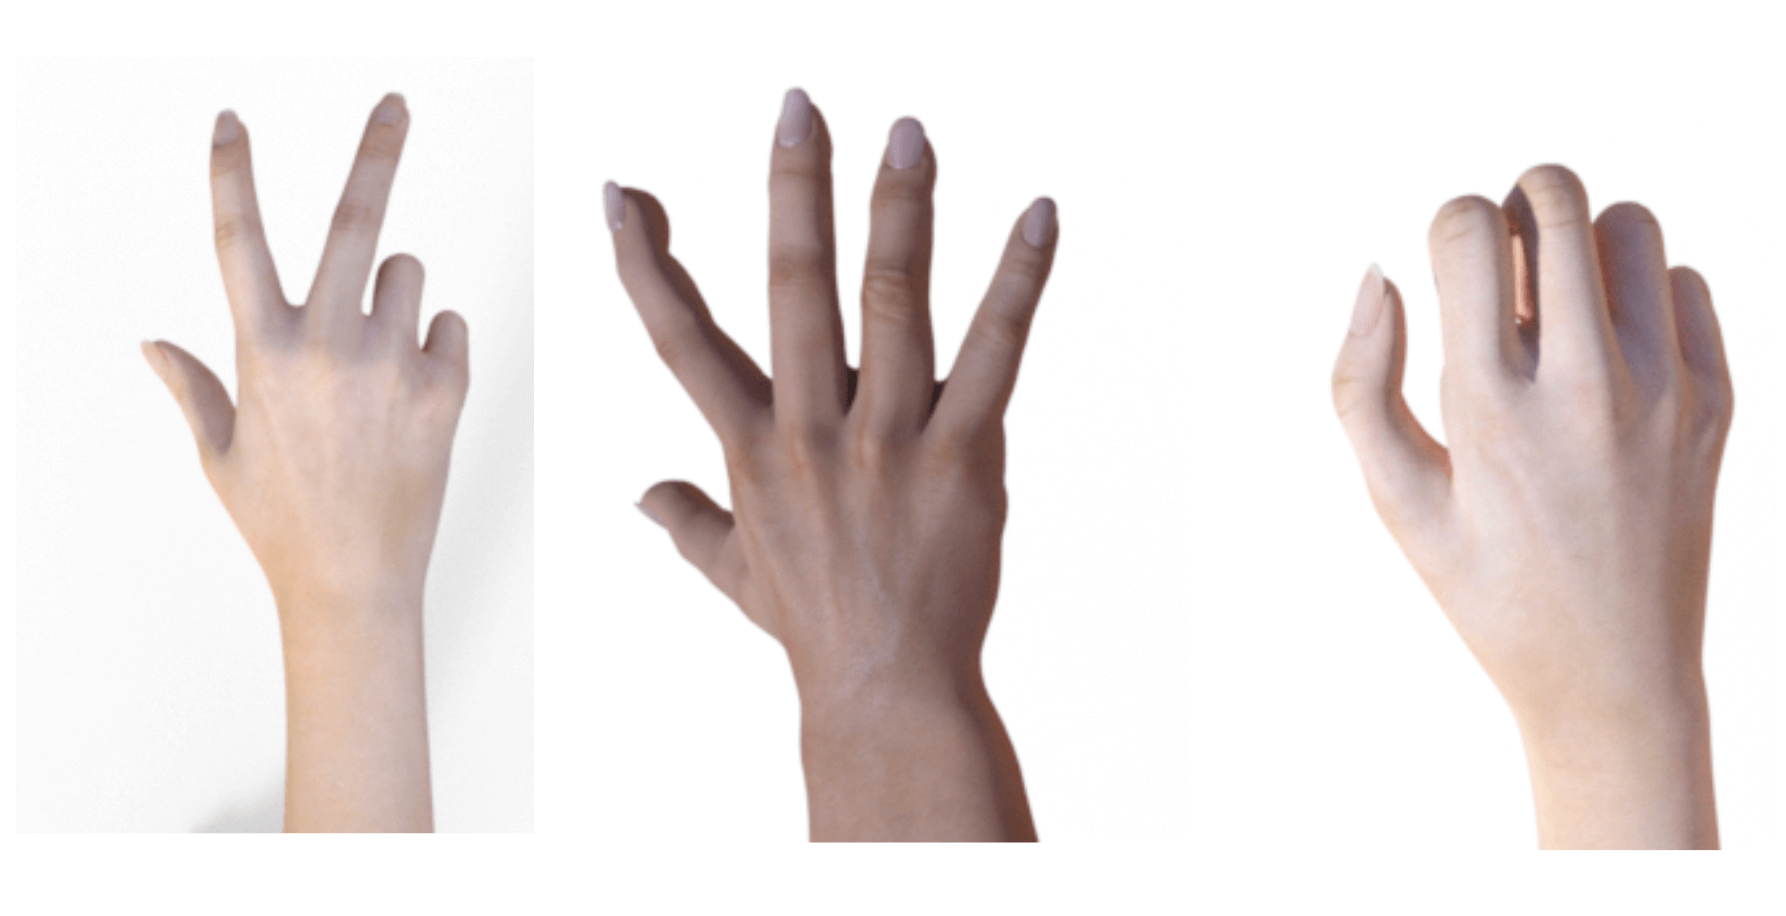

### 1.Начните с загрузки датасета “камень-ножницы-бумага” (Rock-Paper-Scissors). Вы можете скачать его по ссылке или проверить, доступен ли он через встроенные средства torchvision. Для удобной работы с данными используйте класс torchvision.datasets.ImageFolder, который автоматически организует изображения по папкам, соответствующим классам.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
import torch
import matplotlib.image as mpimg

from torch.utils.data import DataLoader
import torch.nn as nn

In [2]:
sns.set_theme(style="whitegrid", palette="tab10")

In [3]:
train = torchvision.datasets.ImageFolder("Rock-Paper-Scissors/train")
test = torchvision.datasets.ImageFolder("Rock-Paper-Scissors/test")
# df_train = torch.utils.data.DataLoader(train)
# df_test= torch.utils.data.DataLoader(train)
# df = torch.utils.data.ConcatDataset([train, test])

###        2. После загрузки определите общее количество изображений в датасете. Затем подсчитайте, сколько изображений относится к каждому из трех классов: "камень", "ножницы" и "бумага". Постройте гистограмму, чтобы показать распределение изображений по классам.

In [4]:
# print(f"Размер датасета: {len(test)}")
# print(f"Размер датасета: {len(train)}")
# print(f"Количество классова: {test.classes }")
# print(f"Количество классова: {train.classes }")

In [5]:
data = pd.concat([pd.DataFrame(train.samples),pd.DataFrame(test.samples)])
data.rename(columns={0:"X", 1:"Y"}, inplace=True)
data


,X,Y
0,Rock-Paper-Scissors/train/paper/paper01-000.png,0
1,Rock-Paper-Scissors/train/paper/paper01-001.png,0
2,Rock-Paper-Scissors/train/paper/paper01-002.png,0
3,Rock-Paper-Scissors/train/paper/paper01-003.png,0
4,Rock-Paper-Scissors/train/paper/paper01-004.png,0
...,...,...
367,Rock-Paper-Scissors/test/scissors/testscissors...,2
368,Rock-Paper-Scissors/test/scissors/testscissors...,2
369,Rock-Paper-Scissors/test/scissors/testscissors...,2
370,Rock-Paper-Scissors/test/scissors/testscissors...,2


Количество объектов

In [6]:
data.count()

X    2892
Y    2892
dtype: int64

In [7]:
print(f"Количество классов: {data.Y.nunique()}")

Количество классов: 3


Количество по классам

In [8]:
data.groupby("Y").count()

,X
Y,
0,964
1,964
2,964


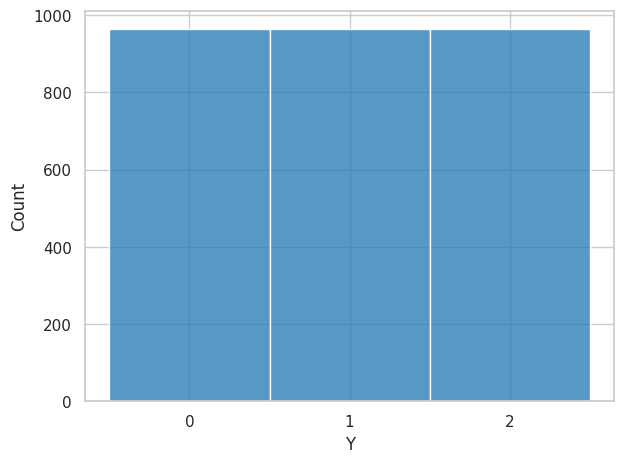

In [9]:
sns.histplot(data.Y.astype("str"),bins=data.Y.nunique())
plt.tight_layout()

### 3.Напишите функцию, которая выбирает по одному случайному изображению из каждого класса и отображает их. Убедитесь, что рядом с каждым изображением указана его метка (например, "камень"). Затем расширьте визуализацию: выберите несколько случайных изображений из датасета (например, 5–6) и отобразите их в виде сетки, также указав их классы. Это даст вам представление о разнообразии данных.

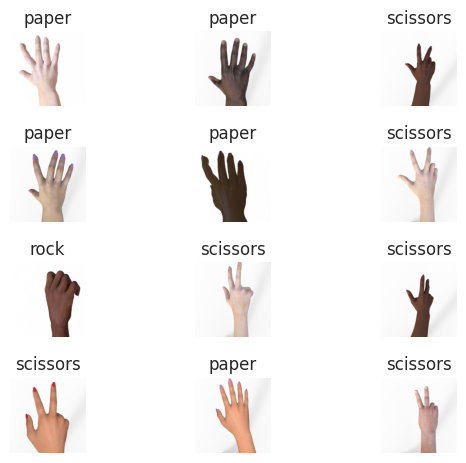

In [10]:
def imshow(data:pd.DataFrame, n=1, cls=None):
    if cls:
        images = data[data.Y == cls].sample(n)
    else:
        images = data.sample(n)
    classes = {0:'paper', 1:'rock', 2:'scissors'}
    cnt = images.shape[0]
    fig, axs = plt.subplots(int(np.ceil(np.sqrt(cnt))), int(np.sqrt(cnt)))
    for (i,(PATH, _class)),ax in zip(enumerate(images.values), axs.ravel()):
        # print(PATH)
        image = mpimg.imread(PATH)
        ax.imshow(image), #title=classes[_class])
        ax.set_title(classes[_class])
        ax.grid()
        ax.axis('off')
    plt.tight_layout()
    plt.show()

imshow(data, n=12)

###      4. Используйте модуль torchvision.transforms для создания набора трансформаций:
        a. Преобразуйте изображения в тензоры с помощью ToTensor().
        b. Выполните масштабирование данных (например, среднее [0.5, 0.5, 0.5] и стандартное отклонение [0.5, 0.5, 0.5] для RGB-каналов).
        c. Примените эти трансформации к датасету через параметр transform в ImageFolder.


In [11]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128, 128)), 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.5,0.5,0.5],
        std=[0.5,0.5,0.5]
    ),
])

In [12]:
train_trans = torchvision.datasets.ImageFolder(
    root='Rock-Paper-Scissors/train',
    transform=transform
)
test_trans = torchvision.datasets.ImageFolder(
    root='Rock-Paper-Scissors/test',
    transform=transform
)

In [13]:
# data_trans = pd.concat([pd.DataFrame(train_trans.samples),pd.DataFrame(test_trans.samples)])
# data_trans.rename(columns={0:"X", 1:"Y"}, inplace=True)
# data_trans


In [14]:
# imshow(data_trans, 9)

# Основное задание (5 баллов)

## 1.	Архитектура модели


    Реализуйте два варианта архитектуры и сравните их:
    a.	Базовая CNN: 2 свёрточных слоя (32 и 64 фильтра) + MaxPooling после каждого.
    b.	Усложнённая CNN: Добавьте третий свёрточный слой (128 фильтров) и Batch Normalization после каждого слоя.
    Рассчитайте размер входа для первого полносвязного слоя (используйте torchinfo.summary() или ручной расчёт через формулу)
    Добавьте Dropout (вероятность 0.5) и активацию ReLU после полносвязных слоев.
 


In [15]:
from basic import BasicCNN
from advance import AdvancedCNN
import torch.optim as optim
from torchvision import transforms
from torchinfo import summary
from torch.utils.data import DataLoader

In [16]:
basic_cnn = BasicCNN()
advanced_cnn = AdvancedCNN()

print("BasicCNN summary:")
summary(basic_cnn, input_size=(1, 3, 128, 128))



BasicCNN summary:


Layer (type:depth-idx)                   Output Shape              Param #
BasicCNN                                 [1, 3]                    --
├─Conv2d: 1-1                            [1, 32, 128, 128]         896
├─ReLU: 1-2                              [1, 32, 128, 128]         --
├─MaxPool2d: 1-3                         [1, 32, 64, 64]           --
├─Conv2d: 1-4                            [1, 64, 64, 64]           18,496
├─ReLU: 1-5                              [1, 64, 64, 64]           --
├─MaxPool2d: 1-6                         [1, 64, 32, 32]           --
├─Linear: 1-7                            [1, 128]                  8,388,736
├─ReLU: 1-8                              [1, 128]                  --
├─Dropout: 1-9                           [1, 128]                  --
├─Linear: 1-10                           [1, 3]                    387
Total params: 8,408,515
Trainable params: 8,408,515
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 98.83
Input size (MB): 0.20
For

In [17]:
print("AdvancedCNN summary:")
summary(advanced_cnn, input_size=(1, 3, 128, 128))

AdvancedCNN summary:


Layer (type:depth-idx)                   Output Shape              Param #
AdvancedCNN                              [1, 3]                    --
├─Conv2d: 1-1                            [1, 32, 128, 128]         896
├─BatchNorm2d: 1-2                       [1, 32, 128, 128]         64
├─ReLU: 1-3                              [1, 32, 128, 128]         --
├─MaxPool2d: 1-4                         [1, 32, 64, 64]           --
├─Conv2d: 1-5                            [1, 64, 64, 64]           18,496
├─BatchNorm2d: 1-6                       [1, 64, 64, 64]           128
├─ReLU: 1-7                              [1, 64, 64, 64]           --
├─MaxPool2d: 1-8                         [1, 64, 32, 32]           --
├─Conv2d: 1-9                            [1, 128, 32, 32]          73,856
├─BatchNorm2d: 1-10                      [1, 128, 32, 32]          256
├─ReLU: 1-11                             [1, 128, 32, 32]          --
├─MaxPool2d: 1-12                        [1, 128, 16, 16]          --
├─Li

In [18]:
def train_model(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        model.eval()
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
    
    return train_losses, test_accuracies


In [19]:
train_loader = DataLoader(train_trans, batch_size=32, shuffle=True)
test_loader = DataLoader(test_trans, batch_size=32, shuffle=False)

## 2.	Инициализация весов

      Используйте инициализацию He/Kaiming для свёрточных слоёв (через nn.init.kaiming_normal_). Сравните обучение с инициализацией по умолчанию и с He-инициализацией.

## 3.	Обучение модели


    Используйте ReduceLROnPlateau (уменьшение learning rate при достижении плато по loss на валидации). Сравните сценарии с фиксированным learning rate и с динамическим (постройте график изменения learning rate). 
    Логируйте не только accuracy, но и F1-score для каждого класса. Визуализируйте матрицу ошибок после каждой эпохи (только для валидационных данных).


In [20]:

models = {
    'Basic_default': BasicCNN(),
    'Basic_he': BasicCNN(init_type='he'),
    'Advanced_default': AdvancedCNN(),
    'Advanced_he': AdvancedCNN(init_type='he')
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    train_loss, test_acc = train_model(model, train_loader, test_loader)
    results[name] = {'train_loss': train_loss, 'test_acc': test_acc}


Training Basic_default...
Epoch [1/10], Loss: 0.6672, Test Accuracy: 74.46%
Epoch [2/10], Loss: 0.0622, Test Accuracy: 74.19%
Epoch [3/10], Loss: 0.0129, Test Accuracy: 76.88%
Epoch [4/10], Loss: 0.0056, Test Accuracy: 76.08%
Epoch [5/10], Loss: 0.0043, Test Accuracy: 78.23%
Epoch [6/10], Loss: 0.0079, Test Accuracy: 75.54%
Epoch [7/10], Loss: 0.0075, Test Accuracy: 77.42%
Epoch [8/10], Loss: 0.0018, Test Accuracy: 78.23%
Epoch [9/10], Loss: 0.0022, Test Accuracy: 76.88%
Epoch [10/10], Loss: 0.0011, Test Accuracy: 75.81%

Training Basic_he...
Epoch [1/10], Loss: 0.8214, Test Accuracy: 78.49%
Epoch [2/10], Loss: 0.0503, Test Accuracy: 80.91%
Epoch [3/10], Loss: 0.0124, Test Accuracy: 81.72%
Epoch [4/10], Loss: 0.0101, Test Accuracy: 81.18%
Epoch [5/10], Loss: 0.0077, Test Accuracy: 81.45%
Epoch [6/10], Loss: 0.0038, Test Accuracy: 80.38%
Epoch [7/10], Loss: 0.0035, Test Accuracy: 79.03%
Epoch [8/10], Loss: 0.0042, Test Accuracy: 83.87%
Epoch [9/10], Loss: 0.0076, Test Accuracy: 81.45%


In [21]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model_advanced(model, train_loader, val_loader, num_epochs=15, lr=0.001, use_scheduler=True):
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=2, factor=0.5) if use_scheduler else None
    
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': [],
        'val_f1': [],
        'lr': [],
        'conf_matrix': []
    }
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(val_loader)
        val_acc = 100 * (np.array(all_preds) == np.array(all_labels)).mean()
        val_f1 = 100 * f1_score(all_labels, all_preds, average='macro')
        cm = confusion_matrix(all_labels, all_preds)
        
        if scheduler:
            scheduler.step(val_loss)
        
        history['train_loss'].append(running_loss/len(train_loader))
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)
        history['lr'].append(optimizer.param_groups[0]['lr'])
        history['conf_matrix'].append(cm)
        
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=train_trans.classes, 
                    yticklabels=train_trans.classes)
        plt.title(f'Epoch {epoch+1} Confusion Matrix')
        plt.ylabel('True')
        plt.xlabel('Predicted')
        plt.show()
        
        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss: {history['train_loss'][-1]:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Acc: {val_acc:.2f}%, "
              f"Val F1: {val_f1:.2f}%, "
              f"LR: {history['lr'][-1]:.6f}")
    
    return history

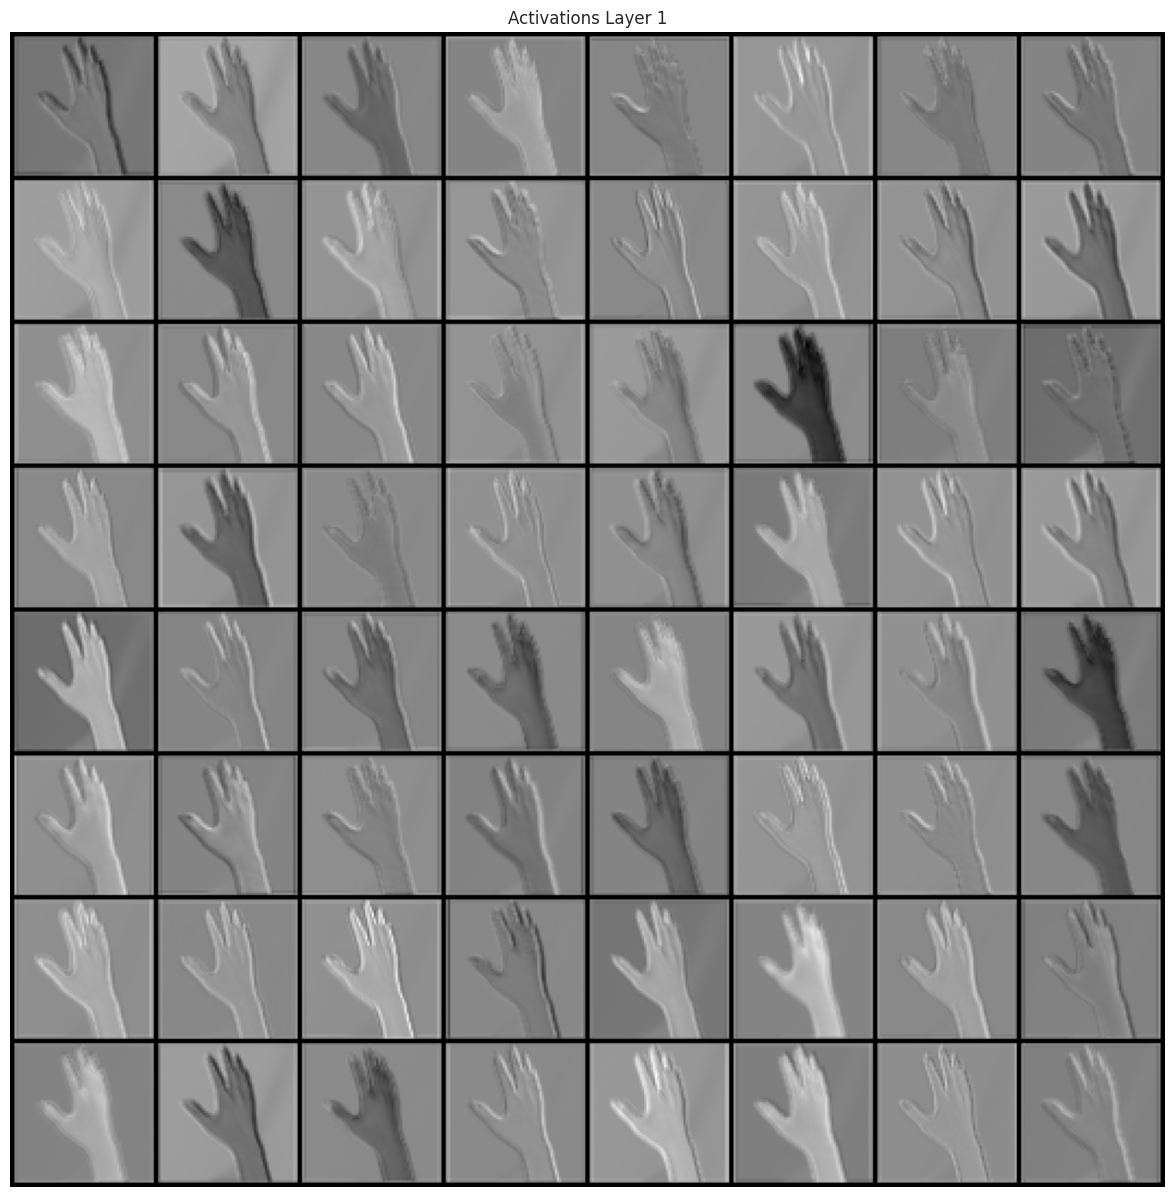

In [22]:
def visualize_activations(model, test_image, layer_num=0):
    activations = []
    
    def hook_fn(m, i, o):
        activations.append(o.detach())
    
    hooks = []
    conv_layers = [m for m in model.modules() if isinstance(m, nn.Conv2d)]
    hooks.append(conv_layers[layer_num].register_forward_hook(hook_fn))
    
    model.eval()
    with torch.no_grad():
        _ = model(test_image.unsqueeze(0).to(device))
    
    for h in hooks:
        h.remove()
    
    act = activations[0][0]  # Берем первый батч
    grid = torchvision.utils.make_grid(act.unsqueeze(1), nrow=8, normalize=True)
    plt.figure(figsize=(15, 15))
    plt.imshow(grid.permute(1, 2, 0).cpu())
    plt.title(f'Activations Layer {layer_num}')
    plt.axis('off')
    plt.show()

test_img, _ = test_trans[0]
visualize_activations(model, test_img, layer_num=1)

## 4.	Интерпретация признаков


    Визуализируйте активации свёрточных слоёв для тестовых изображений, используя torchvision.utils.make_grid. Постройте Grad-CAM (Gradient-weighted Class Activation Mapping) для анализа областей внимания модели. Укажите в отчёте выводы по полученным результатам.


In [23]:
from grad import GradCAM

/home/iversy/projects/Deep/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40392154..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40392154..0.99215686].


torch.Size([1, 64, 64, 64])
torch.Size([1, 64, 64, 64])


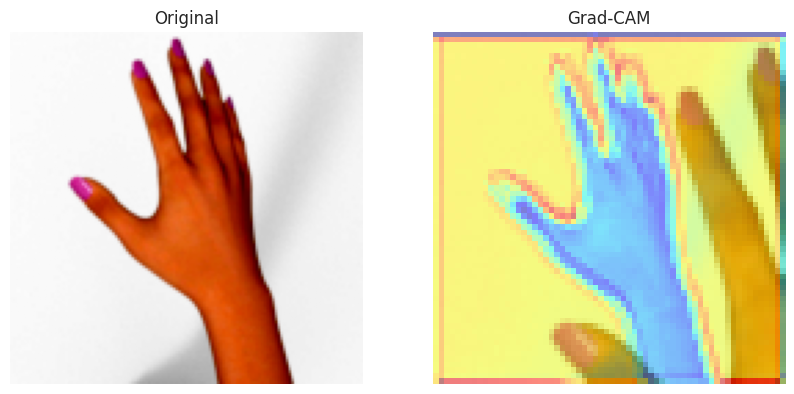

In [24]:
model = BasicCNN()
for module in model.modules():
    if isinstance(module, nn.Conv2d):
        target_layer = module

if target_layer is None:
    raise ValueError("No convolutional layer found in model")
grad_cam = GradCAM(model, target_layer)

img, label = test_trans[0]
img_tensor = img.unsqueeze(0)#.to(device)

cam = grad_cam(img_tensor)
print(grad_cam.gradients.shape)
print(grad_cam.activations.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0).cpu())
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img.permute(1, 2, 0).cpu())
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Grad-CAM')
plt.axis('off')
plt.show()

## 5.	Cравнение моделей


    Создайте сравнительную таблицу двух моделей по следующим показателям: точность на валидации, точность на тестовой выборке, время обучения.


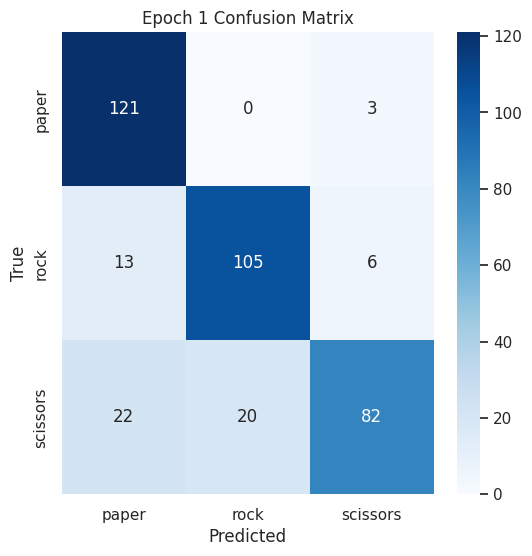

Epoch 1/15: Train Loss: 0.4032, Val Loss: 0.4627, Val Acc: 82.80%, Val F1: 82.35%, LR: 0.001000


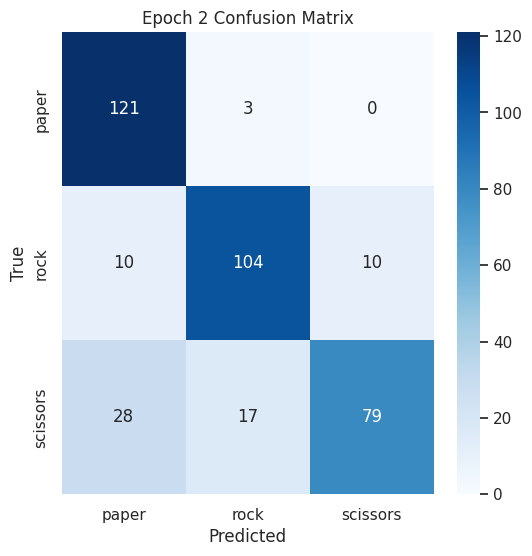

Epoch 2/15: Train Loss: 0.0187, Val Loss: 0.5992, Val Acc: 81.72%, Val F1: 81.19%, LR: 0.001000


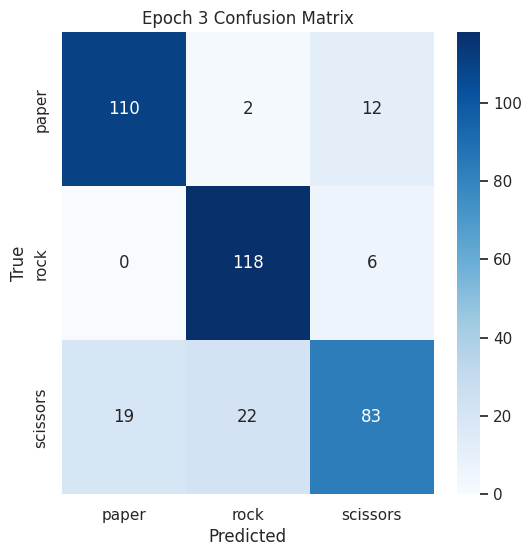

Epoch 3/15: Train Loss: 0.0059, Val Loss: 0.5926, Val Acc: 83.60%, Val F1: 83.15%, LR: 0.001000


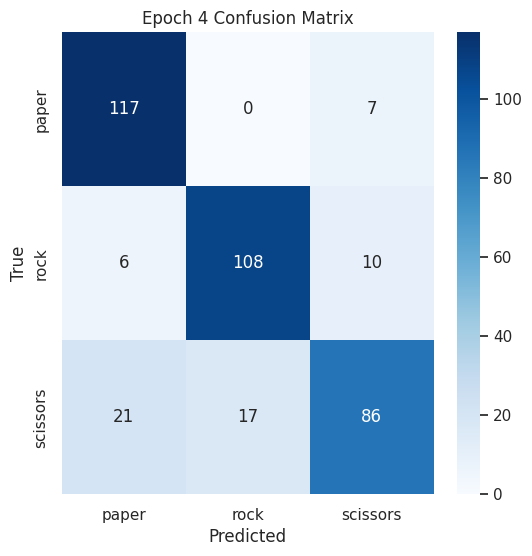

Epoch 4/15: Train Loss: 0.0020, Val Loss: 0.5626, Val Acc: 83.60%, Val F1: 83.28%, LR: 0.000500


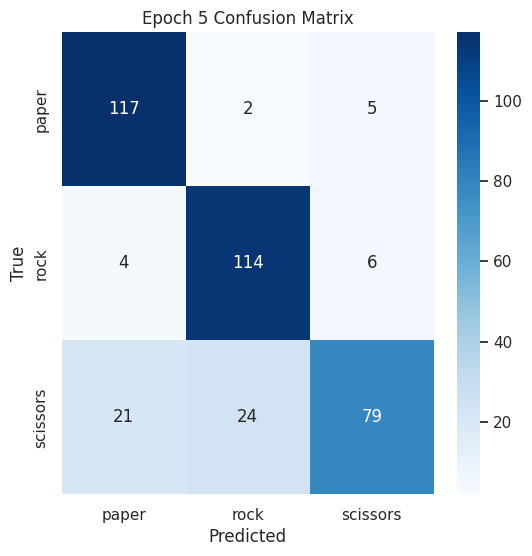

Epoch 5/15: Train Loss: 0.0009, Val Loss: 0.6752, Val Acc: 83.33%, Val F1: 82.72%, LR: 0.000500


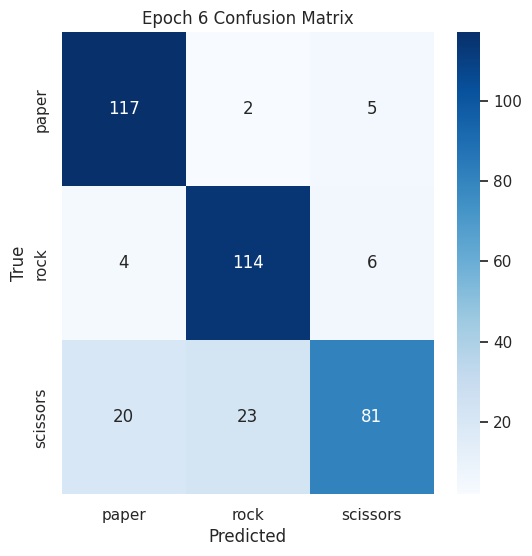

Epoch 6/15: Train Loss: 0.0007, Val Loss: 0.7016, Val Acc: 83.87%, Val F1: 83.33%, LR: 0.000500


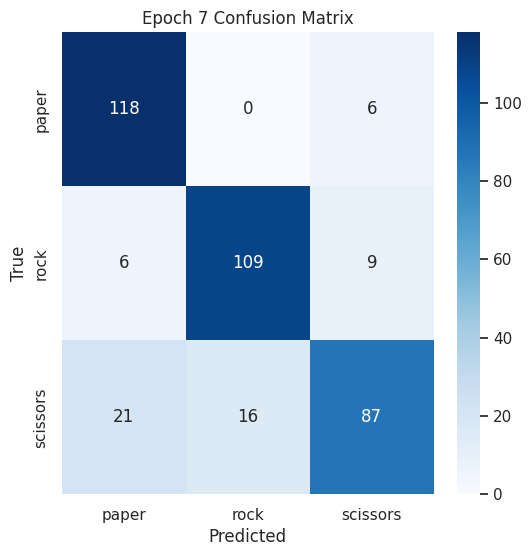

Epoch 7/15: Train Loss: 0.0004, Val Loss: 0.6715, Val Acc: 84.41%, Val F1: 84.09%, LR: 0.000250


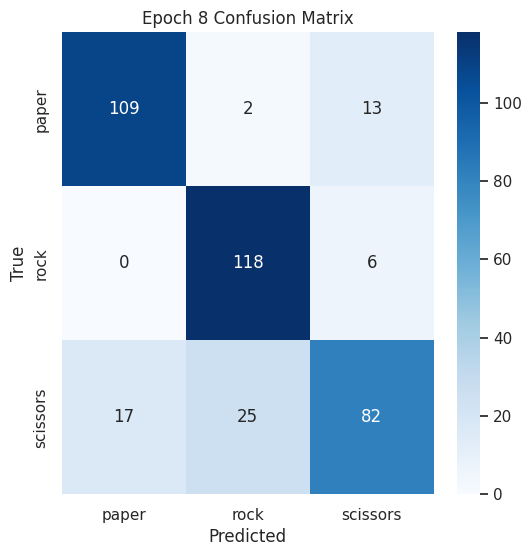

Epoch 8/15: Train Loss: 0.0005, Val Loss: 0.7574, Val Acc: 83.06%, Val F1: 82.61%, LR: 0.000250


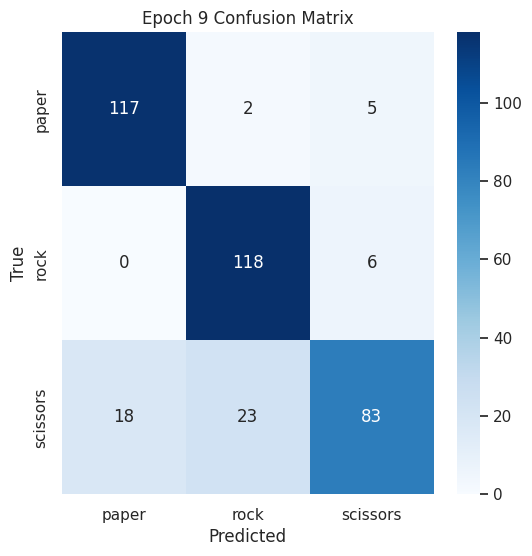

Epoch 9/15: Train Loss: 0.0003, Val Loss: 0.7429, Val Acc: 85.48%, Val F1: 84.96%, LR: 0.000250


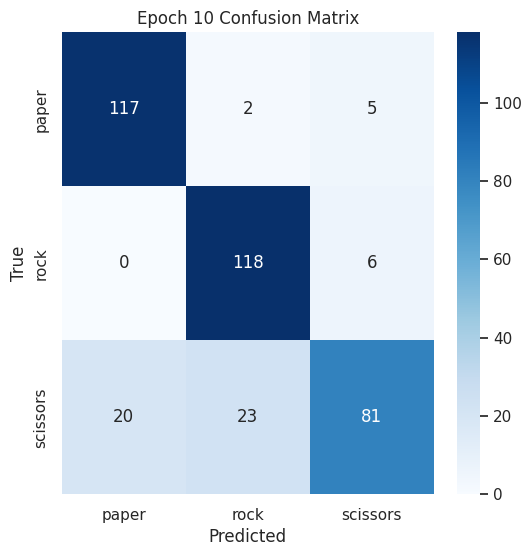

Epoch 10/15: Train Loss: 0.0002, Val Loss: 0.7576, Val Acc: 84.95%, Val F1: 84.35%, LR: 0.000125


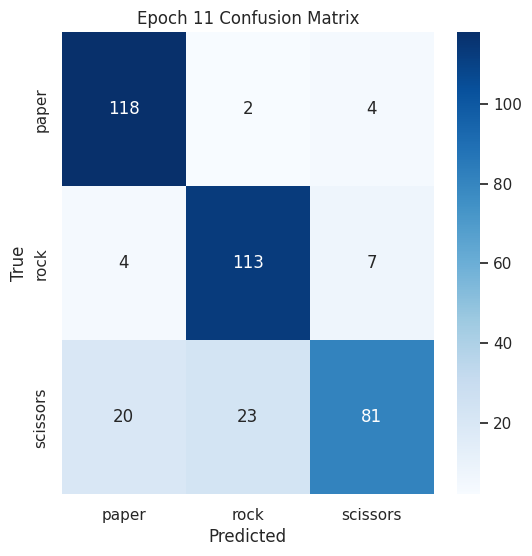

Epoch 11/15: Train Loss: 0.0006, Val Loss: 0.7603, Val Acc: 83.87%, Val F1: 83.33%, LR: 0.000125


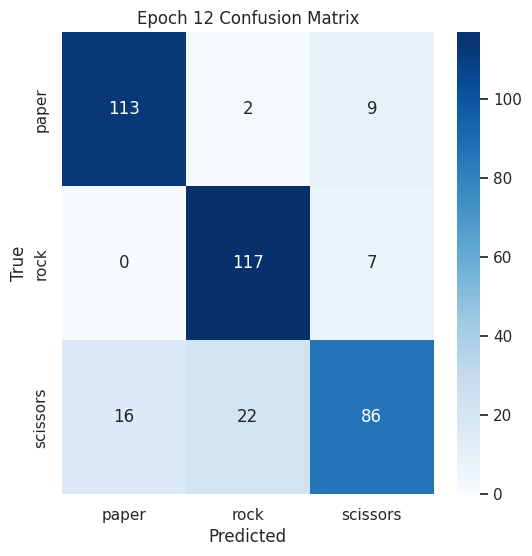

Epoch 12/15: Train Loss: 0.0003, Val Loss: 0.7415, Val Acc: 84.95%, Val F1: 84.58%, LR: 0.000125


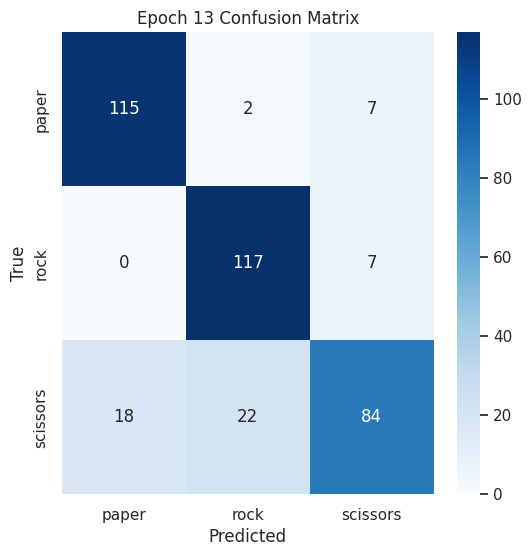

Epoch 13/15: Train Loss: 0.0001, Val Loss: 0.7527, Val Acc: 84.95%, Val F1: 84.49%, LR: 0.000063


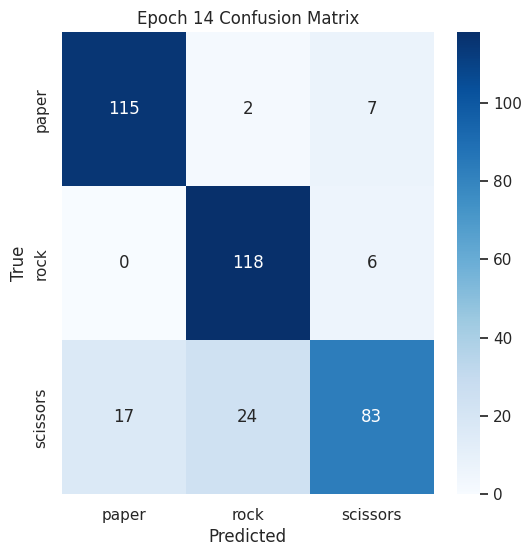

Epoch 14/15: Train Loss: 0.0003, Val Loss: 0.7712, Val Acc: 84.95%, Val F1: 84.45%, LR: 0.000063


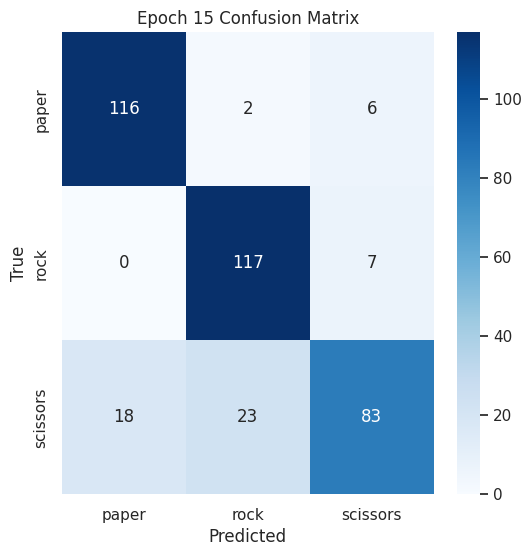

Epoch 15/15: Train Loss: 0.0002, Val Loss: 0.7723, Val Acc: 84.95%, Val F1: 84.45%, LR: 0.000063


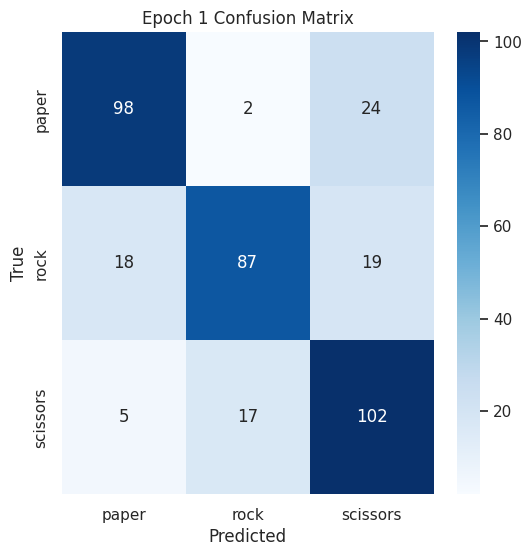

Epoch 1/15: Train Loss: 1.0818, Val Loss: 0.7524, Val Acc: 77.15%, Val F1: 77.16%, LR: 0.001000


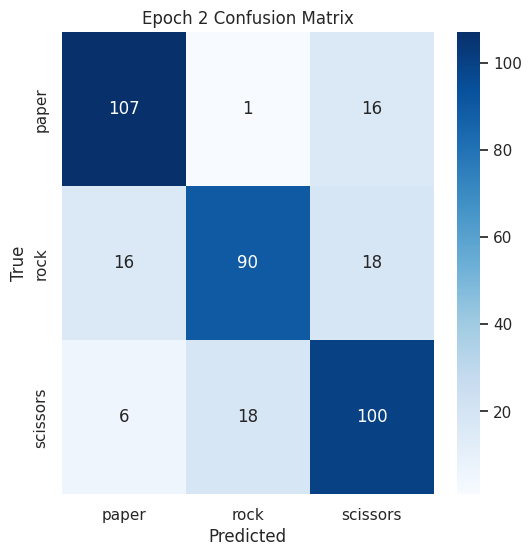

Epoch 2/15: Train Loss: 0.0211, Val Loss: 0.8256, Val Acc: 79.84%, Val F1: 79.79%, LR: 0.001000


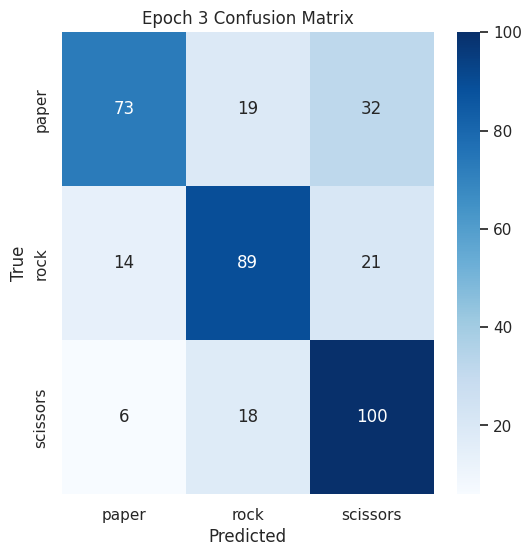

Epoch 3/15: Train Loss: 0.0089, Val Loss: 0.9430, Val Acc: 70.43%, Val F1: 70.23%, LR: 0.001000


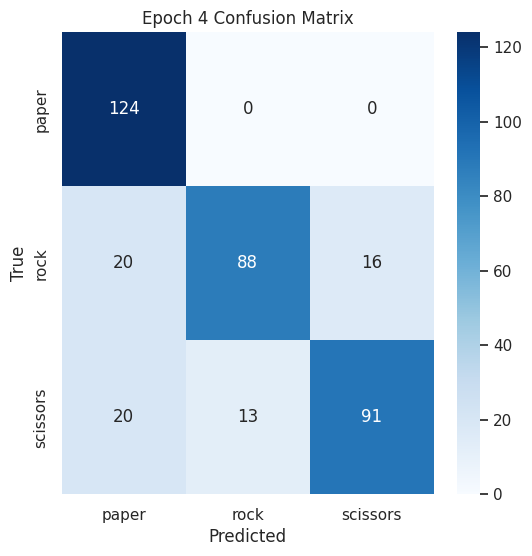

Epoch 4/15: Train Loss: 0.0093, Val Loss: 1.0515, Val Acc: 81.45%, Val F1: 81.04%, LR: 0.000500


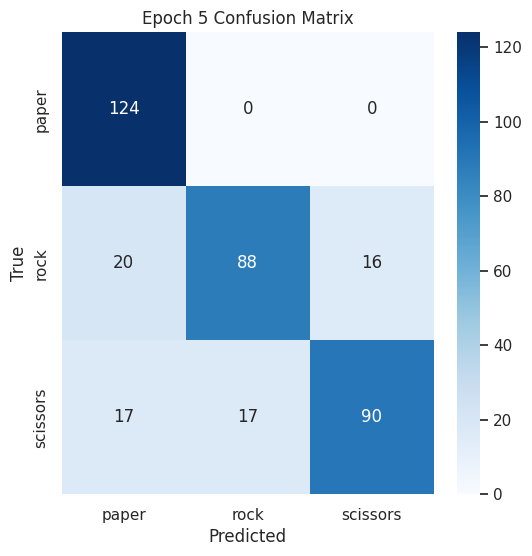

Epoch 5/15: Train Loss: 0.0029, Val Loss: 1.0428, Val Acc: 81.18%, Val F1: 80.71%, LR: 0.000500


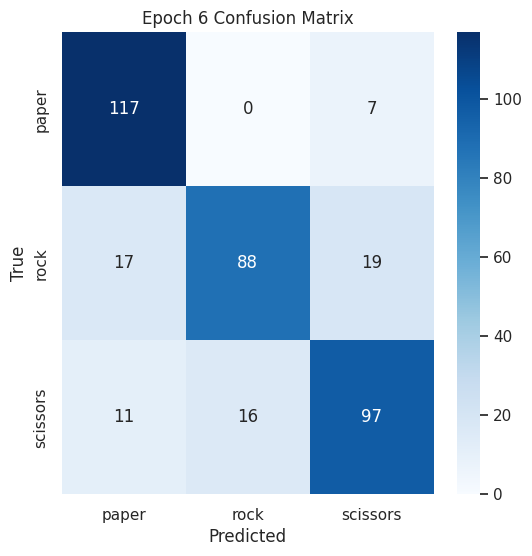

Epoch 6/15: Train Loss: 0.0018, Val Loss: 1.0463, Val Acc: 81.18%, Val F1: 80.91%, LR: 0.000500


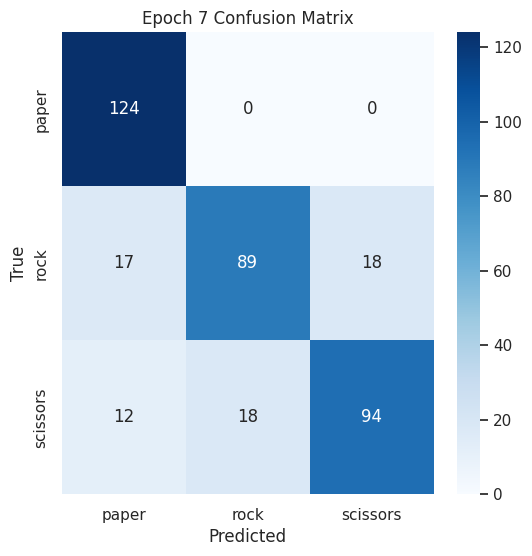

Epoch 7/15: Train Loss: 0.0018, Val Loss: 1.0604, Val Acc: 82.53%, Val F1: 82.08%, LR: 0.000250


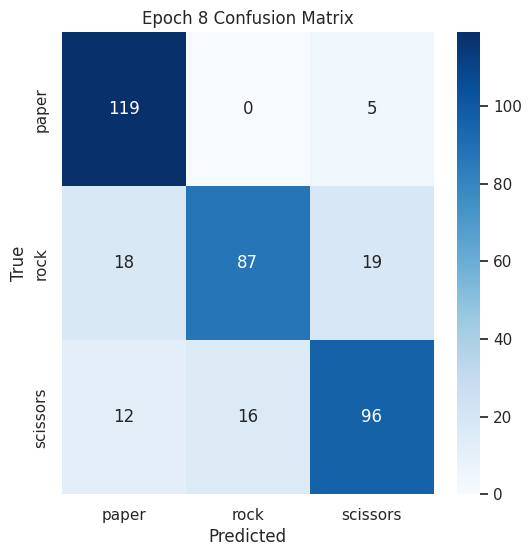

Epoch 8/15: Train Loss: 0.0016, Val Loss: 1.1429, Val Acc: 81.18%, Val F1: 80.84%, LR: 0.000250


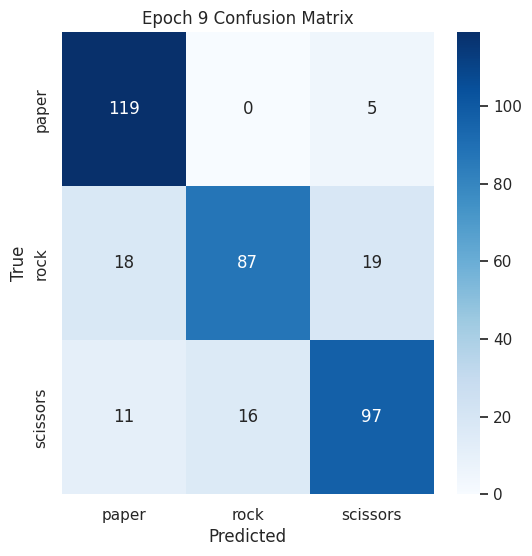

Epoch 9/15: Train Loss: 0.0013, Val Loss: 1.1448, Val Acc: 81.45%, Val F1: 81.11%, LR: 0.000250


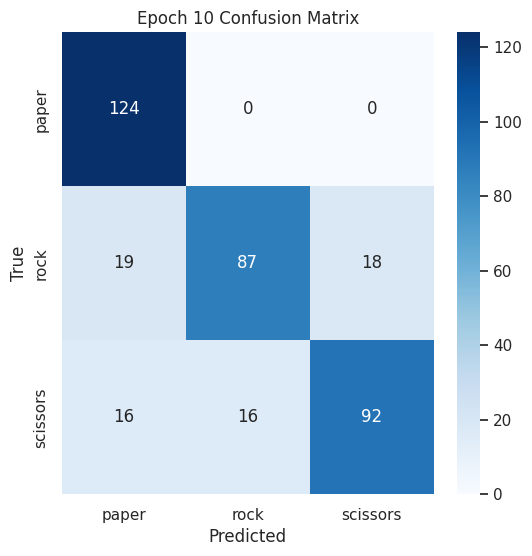

Epoch 10/15: Train Loss: 0.0012, Val Loss: 1.2112, Val Acc: 81.45%, Val F1: 80.97%, LR: 0.000125


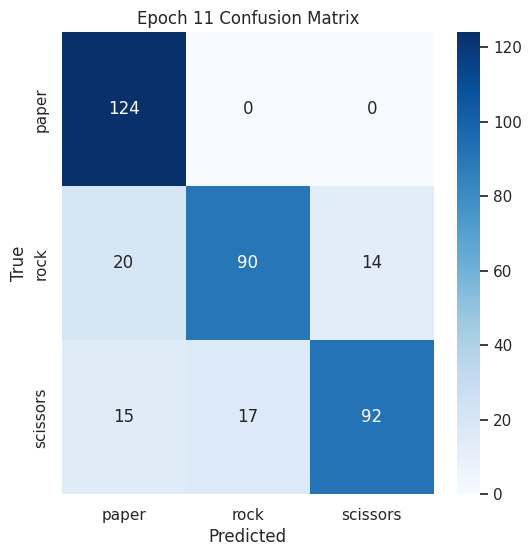

Epoch 11/15: Train Loss: 0.0025, Val Loss: 1.1426, Val Acc: 82.26%, Val F1: 81.85%, LR: 0.000125


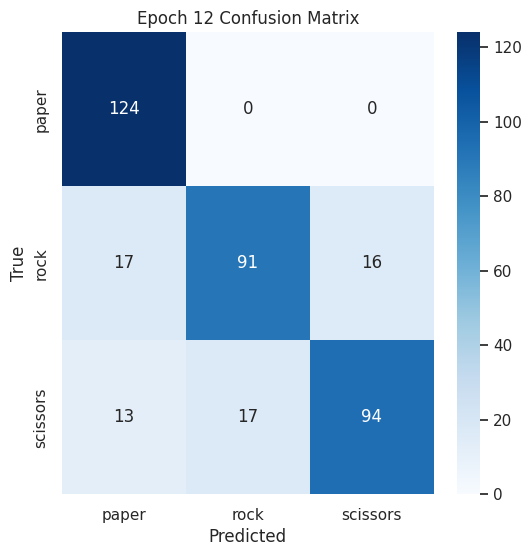

Epoch 12/15: Train Loss: 0.0009, Val Loss: 1.0938, Val Acc: 83.06%, Val F1: 82.67%, LR: 0.000125


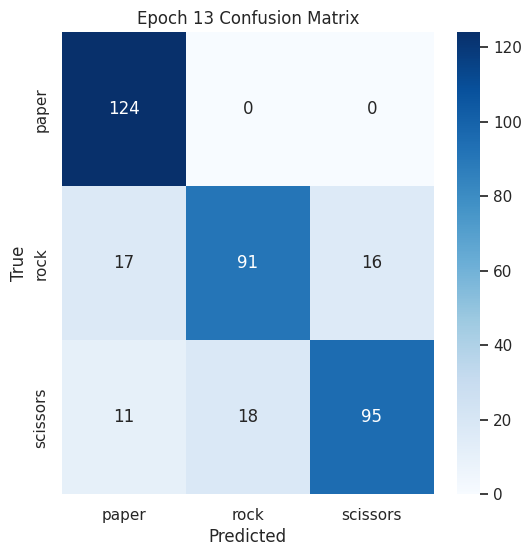

Epoch 13/15: Train Loss: 0.0006, Val Loss: 1.0585, Val Acc: 83.33%, Val F1: 82.94%, LR: 0.000063


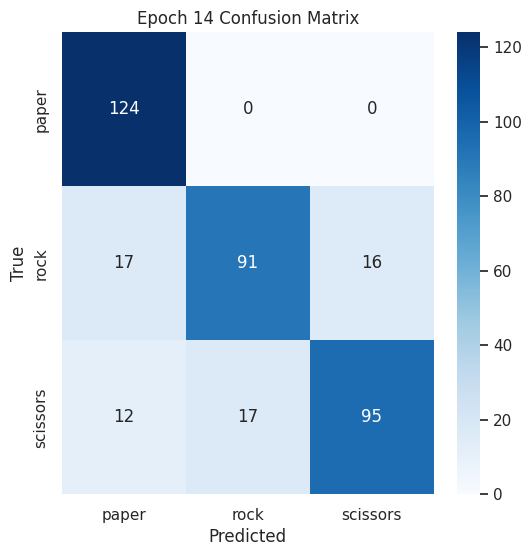

Epoch 14/15: Train Loss: 0.0005, Val Loss: 1.0766, Val Acc: 83.33%, Val F1: 82.94%, LR: 0.000063


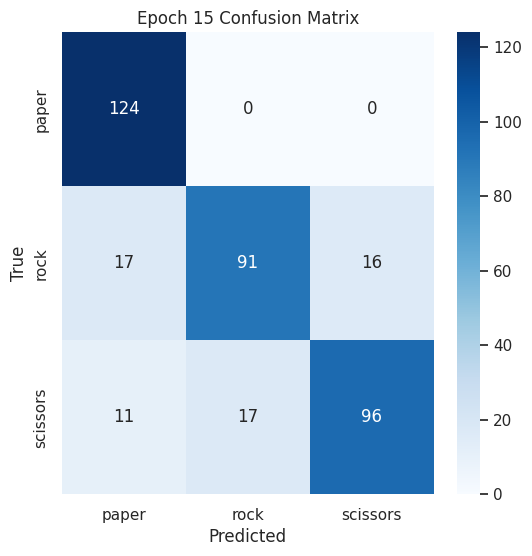

Epoch 15/15: Train Loss: 0.0012, Val Loss: 1.0738, Val Acc: 83.60%, Val F1: 83.22%, LR: 0.000063
      Model  Val Accuracy  Test Accuracy   F1 Score  Training Time (min)  \
0     Basic     85.483871      84.946237  84.961264                  2.8   
1  Advanced     83.602151      83.602151  83.219760                  3.1   

   Final LR  
0  0.000063  
1  0.000063  


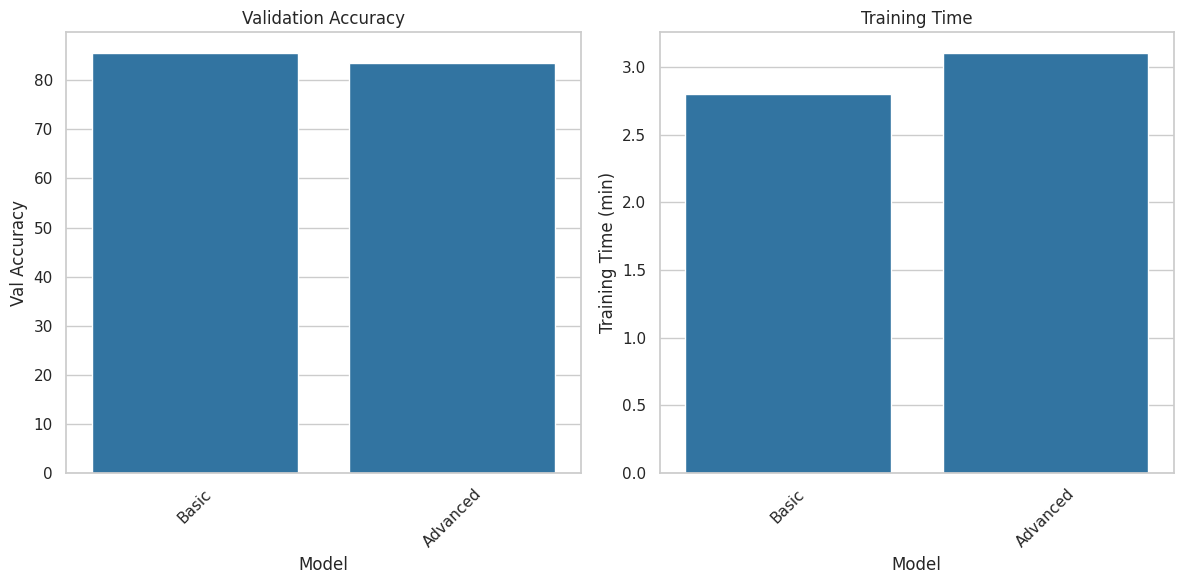

In [25]:
import pandas as pd
from time import time

comparison = []

for model_name, model in [('Basic', BasicCNN(init_type='he')),
                          ('Advanced', AdvancedCNN(init_type='he'))]:
    
    start_time = time()
    history = train_model_advanced(model, train_loader, test_loader, 
                                 num_epochs=15, use_scheduler=True)
    train_time = time() - start_time
    
    best_epoch = np.argmax(history['val_acc'])
    comparison.append({
        'Model': model_name,
        'Val Accuracy': history['val_acc'][best_epoch],
        'Test Accuracy': history['val_acc'][-1],  # Последняя эпоха
        'F1 Score': history['val_f1'][best_epoch],
        'Training Time (min)': round(train_time/60, 1),
        'Final LR': history['lr'][-1]
    })

df_comparison = pd.DataFrame(comparison)
print(df_comparison.sort_values('Val Accuracy', ascending=False))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_comparison, x='Model', y='Val Accuracy')
plt.title('Validation Accuracy')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df_comparison, x='Model', y='Training Time (min)')
plt.title('Training Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

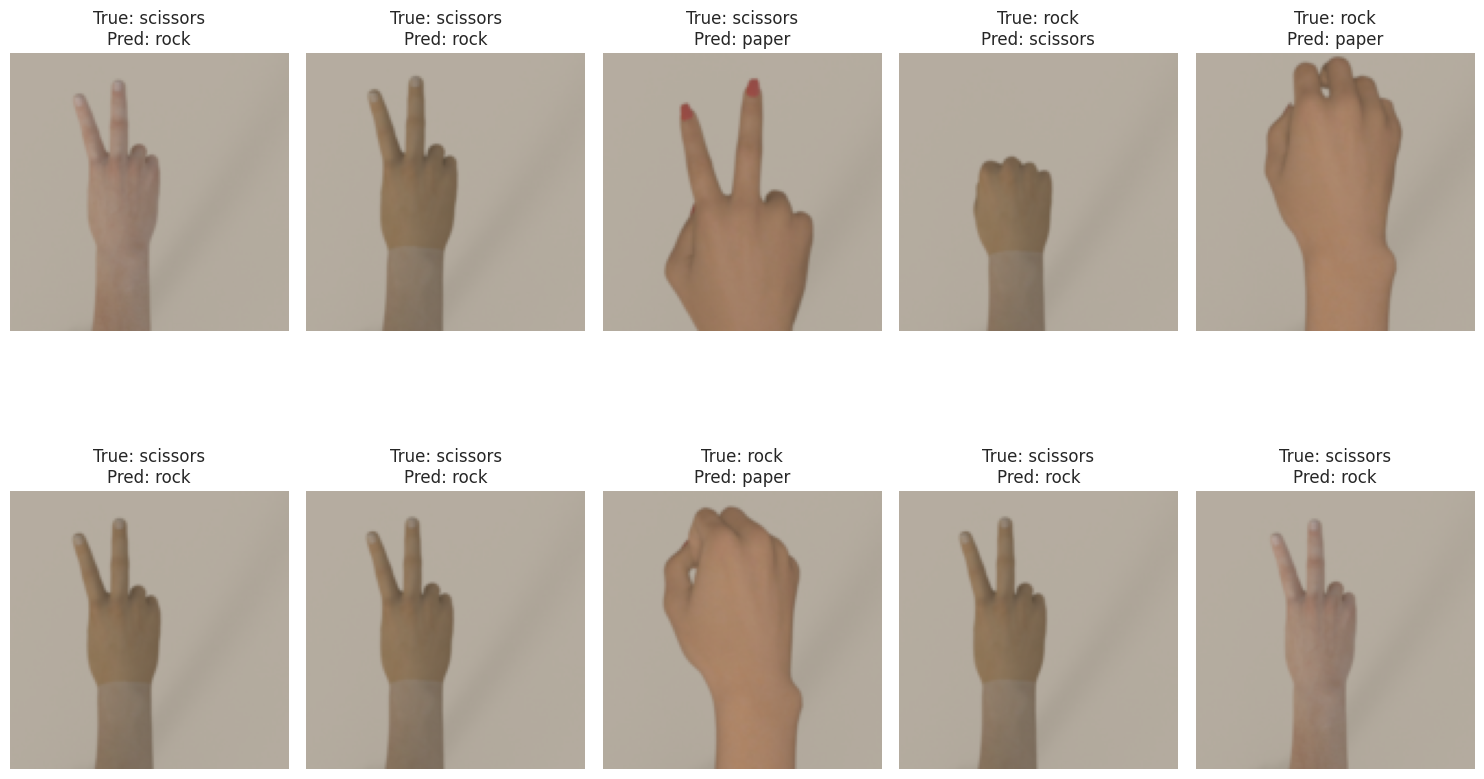

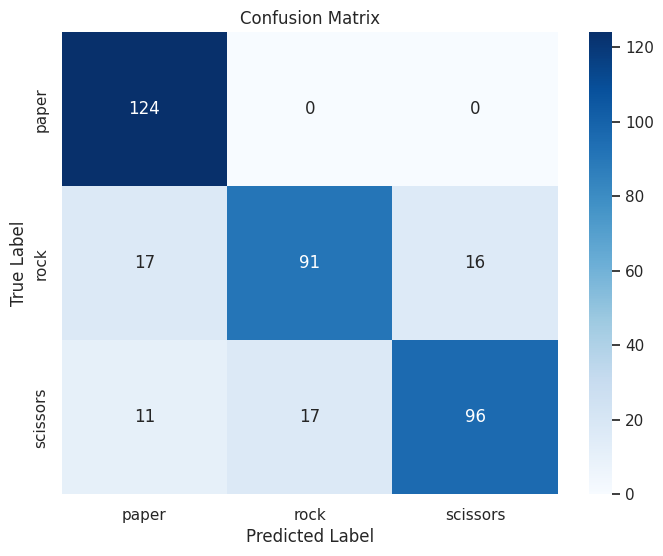

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def find_misclassified(model, test_loader, num_samples=10):
    misclassified = []
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            for i in range(len(images)):
                if preds[i] != labels[i]:
                    misclassified.append({
                        'image': images[i].cpu(),
                        'true': labels[i].cpu(),
                        'pred': preds[i].cpu()
                    })
            # if len(misclassified) >= num_samples:
                # break
    return np.random.choice(misclassified, num_samples)

misclassified = find_misclassified(model, test_loader, 10)

plt.figure(figsize=(15, 10))
for i, item in enumerate(misclassified):
    image = item['image'].permute(1, 2, 0).numpy()
    image = (image * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406])  # Денормализация
    image = np.clip(image, 0, 1)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f"True: {test_trans.classes[item['true']]}\nPred: {test_trans.classes[item['pred']]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#  матрица ошибок 
def plot_confusion_matrix(model, test_loader):
    all_preds = []
    all_true = []
    model.eval()
    model = model.to(device)
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_true, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=test_trans.classes, 
                yticklabels=test_trans.classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_loader)

Modified ResNet18 architecture:

Training ResNet18 with transfer learning...
Epoch 1/10, Train Loss: 0.2210, Val Acc: 81.45%
Epoch 2/10, Train Loss: 0.0346, Val Acc: 84.14%
Epoch 3/10, Train Loss: 0.0230, Val Acc: 84.68%
Epoch 4/10, Train Loss: 0.0138, Val Acc: 83.33%
Epoch 5/10, Train Loss: 0.0230, Val Acc: 79.30%
Epoch 6/10, Train Loss: 0.0197, Val Acc: 83.87%
Epoch 7/10, Train Loss: 0.0100, Val Acc: 85.48%
Epoch 8/10, Train Loss: 0.0082, Val Acc: 83.87%
Epoch 9/10, Train Loss: 0.0079, Val Acc: 81.99%
Epoch 10/10, Train Loss: 0.0066, Val Acc: 80.38%


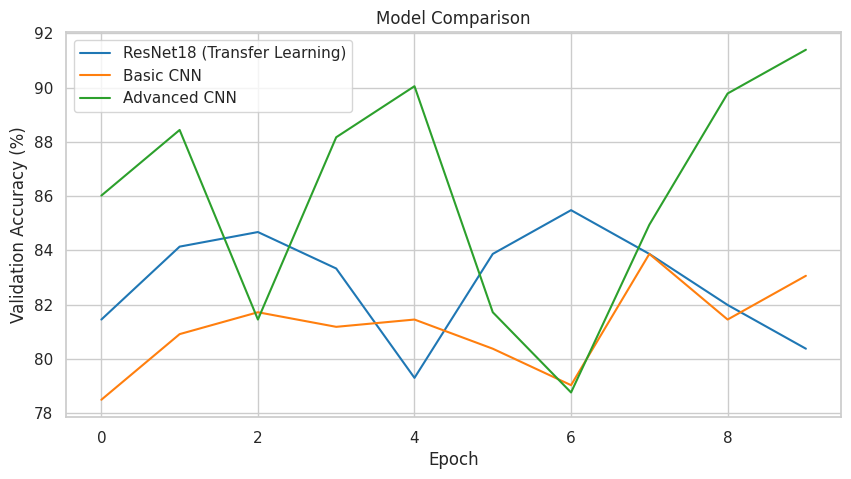

In [30]:
import torchvision.models as models
from torch.optim import lr_scheduler

def get_pretrained_model():
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    
    for param in model.parameters():
        param.requires_grad = False
    
    num_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 3) 
    )
    
    return model

pretrained_model = get_pretrained_model().to(device)

print("Modified ResNet18 architecture:")
summary(pretrained_model, input_size=(1, 3, 128, 128))

def train_transfer_learning(model, train_loader, val_loader, num_epochs=10):
    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
    
    scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    
    criterion = nn.CrossEntropyLoss()
    
    history = {'train_loss': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        model.eval()
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_acc = 100 * correct / total
        history['train_loss'].append(running_loss/len(train_loader))
        history['val_acc'].append(val_acc)
        
        scheduler.step()
        
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {history["train_loss"][-1]:.4f}, '
              f'Val Acc: {val_acc:.2f}%')
    
    return history

print("\nTraining ResNet18 with transfer learning...")
pretrained_history = train_transfer_learning(pretrained_model, train_loader, test_loader)

plt.figure(figsize=(10, 5))
plt.plot(pretrained_history['val_acc'], label='ResNet18 (Transfer Learning)')
plt.plot(results['Basic_he']['test_acc'], label='Basic CNN')
plt.plot(results['Advanced_he']['test_acc'], label='Advanced CNN')
plt.title('Model Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.legend()
plt.show()